In [46]:
import numpy as np
import pandas as pd

awrs = pd.read_csv('fixed-awr.csv').drop(columns=['Problem'])
best_activation = awrs.min(axis=1)
ratio = awrs.div(best_activation, axis=0)
results = ratio.agg(['min', 'max', 'mean', 'std', 'count']).transpose()
results['count'] = 100 * (results['count'] / ratio.shape[0])
results.round(2)

,min,max,mean,std,count
8:1,1.0,150.67,1.37,1.98,85.25
5:1,1.0,122.22,1.33,1.64,86.10
4:1,1.0,101.44,1.32,1.42,86.93
3:1,1.0,105.00,1.29,1.41,87.63
2:1,1.0,112.67,1.27,1.45,88.62
3:2,1.0,119.89,1.27,1.51,89.83
5:4,1.0,125.00,1.26,1.55,89.98
1,1.0,133.56,1.26,1.63,90.56
2:3,1.0,147.67,1.28,1.79,91.20
2,1.0,162.67,1.31,1.97,91.68


In [57]:
import numpy as np
import pandas as pd

awrs = pd.read_csv('fixed-awr.csv').drop(columns=['Problem'])
solved = awrs.where(np.isnan, 1.0).mask(np.isnan, 0.0)
solved['total'] = solved.sum(axis=1)
uniques = solved[solved['total'] == 1.0]
uniques.sum()

8:1       16.0
5:1        1.0
4:1        1.0
3:1        2.0
2:1        3.0
3:2        2.0
5:4        4.0
1          4.0
2:3        9.0
2          0.0
3          5.0
4          3.0
5          2.0
6          1.0
7          1.0
8          2.0
10         1.0
12         0.0
14         4.0
16         5.0
20         3.0
24         2.0
28         2.0
32         1.0
40         4.0
50         1.0
64         2.0
128        3.0
1024      23.0
total    107.0
dtype: float64

In [29]:
import pandas as pd

awrs = pd.read_csv('fixed-awr.csv').drop(columns=['Problem'])
best = awrs.min(axis=1)
worst = awrs.max(axis=1)
default = awrs['1']
optimal = awrs['5']

data = pd.DataFrame({
    '1:1': default / best,
    '1:5': optimal / best,
    'worst': worst / best,
})
data.agg(['max', 'mean', 'std']).transpose().round(2)

,max,mean,std
1:1,133.56,1.26,1.63
1:5,133.67,1.44,1.70
worst,222.01,3.95,7.60


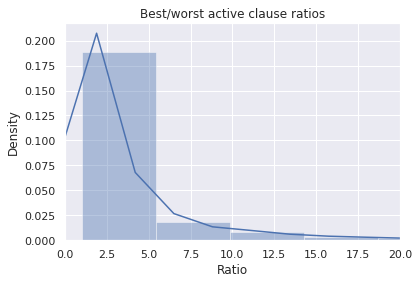

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

awrs = pd.read_csv('fixed-awr.csv').drop(columns=['Problem'])
best_activation = awrs.min(axis=1)
ratio = awrs.div(best_activation, axis=0).fillna(1.0)
improvement = ratio.max(axis=1)

sns.distplot(improvement)
plt.xlim((0, 20))
plt.title("Best/worst active clause ratios")
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.savefig("optimal-awr-improvement.pdf", bbox_inches='tight')